
## Question 3

-  Build a DNN model for Bike Sharing Dataset to check count of total rental bikes including both casual and registered - Regression problem
-  Understand basic DNN model building process using Keras
-  Analyze model performance and capacity vs generalization tradeoff
-  Modify models to reduce overfitting and improve performance
-  Analyze results and explore improvements to model

## Step 1: Import Libraries

In [0]:
#Importing all necessory librariies

from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)
import os

1.14.0




##Step 2: Import Data

In [0]:
#import data from source

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


concrete_dataframe = pd.read_csv("day.csv", sep=",")

for col in concrete_dataframe.columns: 
   print(col)
  
concrete_dataframe.head()

instant
dteday
season
yr
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.3,0.4,0.8,0.2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.4,0.4,0.7,0.2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.2,0.2,0.4,0.2,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.2,0.2,0.6,0.2,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.2,0.2,0.4,0.2,82,1518,1600


##Step 3: Preprocess

In [0]:

#There are some categorical variables available in the dataset, therefore we will have to divide dataframe into two different dataframe to perform normalisation operation

#Diving categorical columns and adding in dataframe called concrete_categorical 

categorical_col = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
concrete_categorical = concrete_dataframe[categorical_col]

#Diving continuous columns and adding in dataframe called concrete_continuous 

continuous_col = ['temp','atemp','hum','windspeed']
concrete_continuous = concrete_dataframe[continuous_col]

#Diving target variable and adding in dataframe called concrete_target

concrete_target = concrete_dataframe["cnt"]
print(concrete_target)

#converting categorical variables into dummies using one hot enconding 

oh_concrete_categorical = pd.get_dummies(concrete_categorical,columns=categorical_col, drop_first=False)

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64


In [0]:
# Choose the first 600 examples for training.

training_continuous = concrete_continuous.head(600)
training_categorical = oh_concrete_categorical.head(600)
training_target = concrete_target.head(600)

# Choose the last 131 examples for validation.

validation_continuous = concrete_continuous.tail(131)
validation_categorical = oh_concrete_categorical.tail(131)
validation_target = concrete_target.tail(131)

In [0]:
#Standardize features by removing the mean and scaling to unit variance for training and validation dataframes (for continuous variables only)

scaler = StandardScaler().fit(training_continuous.values)
scaledf = scaler.transform(training_continuous.values)
scaled_training_continuous = pd.DataFrame(scaledf, index=training_continuous.index, columns=training_continuous.columns)

vscaled = scaler.transform(validation_continuous.values)
scaled_validation_continuous = pd.DataFrame(vscaled, index=validation_continuous.index, columns=validation_continuous.columns)

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(scaled_training_continuous.describe())
print("Validation examples summary:")
display.display(scaled_validation_continuous.describe())

print("Training targets summary:")
display.display(training_target.describe())
print("Validation targets summary:")
display.display(validation_target.describe())



Training examples summary:


,temp,atemp,hum,windspeed
count,600.0,600.0,600.0,600.0
mean,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0
min,-2.4,-2.4,-4.3,-2.2
25%,-0.9,-0.8,-0.8,-0.7
50%,0.0,0.1,-0.0,-0.1
75%,0.9,0.9,0.7,0.5
max,1.9,2.1,2.4,4.1


Validation examples summary:


,temp,atemp,hum,windspeed
count,131.0,131.0,131.0,131.0
mean,-0.2,-0.2,0.2,-0.2
std,0.8,0.8,0.8,1.1
min,-1.5,-1.5,-2.0,-1.9
25%,-0.9,-0.9,-0.5,-1.0
50%,-0.3,-0.3,0.1,-0.4
75%,0.4,0.5,0.8,0.5
max,1.4,1.4,2.1,2.8


Training targets summary:


count    600.0
mean    4225.9
std     1822.7
min      431.0
25%     2908.5
50%     4298.0
75%     5367.0
max     8362.0
Name: cnt, dtype: float64

Validation targets summary:


count    131.0
mean    5779.9
std     1941.1
min       22.0
25%     5097.0
50%     5875.0
75%     7440.0
max     8714.0
Name: cnt, dtype: float64

In [0]:
#Combining dataframe for categorical and continuous variables 

training_combined = pd.concat([scaled_training_continuous, training_categorical],axis=1)
validation_combined =  pd.concat([scaled_validation_continuous, validation_categorical], axis=1)

##Step 4: 1. Baseline model for Bike sharing dataset

In [0]:
#Checking error of the baseline model 

baseline_error = validation_target.mad()
print("Mean absolute deviation for Baseline Model: ",baseline_error)

Mean absolute deviation for Baseline Model:  1504.6538080531475


##Step 4: 2. Build First Model for Bike sharing dataset

In [0]:

#Building first model for regression

first_model = keras.Sequential([keras.layers.Dense(32,activation=tf.nn.relu,
                       input_shape=(training_combined.shape[1],)),
                       keras.layers.Dense(32,activation=tf.nn.relu,),
                       keras.layers.Dense(1)  # for regression using no activation function for last layer
                        ])

optimizer = tf.train.AdamOptimizer(0.001)

first_model.compile(loss='mse', # mean squared error
                optimizer=optimizer,
                metrics=['mae'])  #mean absolute error

# no. of neurons in hidden layer=input+output/2
# or 2/3 Input +output
# or 2 times input
# relu has to do with optimisation, easier to compute gradients



##Step 4: 3. Build L1 Model for Bike sharing dataset

In [0]:


#Building model l1 for regression

l1_model = keras.Sequential([
    keras.layers.Dense(60, activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(60, activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(60, activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32,activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                      ),
    keras.layers.Dense(16,activation=tf.nn.relu,
                       kernel_regularizer=keras.regularizers.l2(0.1),
                      ),
    keras.layers.Dense(1)
  ])

l1_model.compile(loss='mse', # mean squared error
                optimizer=optimizer,
                metrics=['mae']) 

##Step 5: Fit Model (First model, L1 model )


In [0]:
class PrintDot(keras.callbacks.Callback): # prints dot at the end of every epoch
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100  # number of times the model runs with different orders of 83 records
tf.set_random_seed(1)

# Store training stats
f1_history = first_model.fit(training_combined, training_target, epochs=EPOCHS,
                    validation_data= (validation_combined, validation_target), verbose=0,
                    callbacks=[PrintDot()])


l1_history = l1_model.fit(training_combined, training_target, epochs=EPOCHS,
                    validation_data= (validation_combined, validation_target), verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................

In [0]:
#printing keys for first model 

print(f1_history.history.keys())

#finding mean of both models (mean absolute error)

print(min(f1_history.history['val_mean_absolute_error']))
print(min(l1_history.history['val_mean_absolute_error']))

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])
1219.7787
735.8213


## Step 6: Plot Results
### 1. Graph for mean absolute error

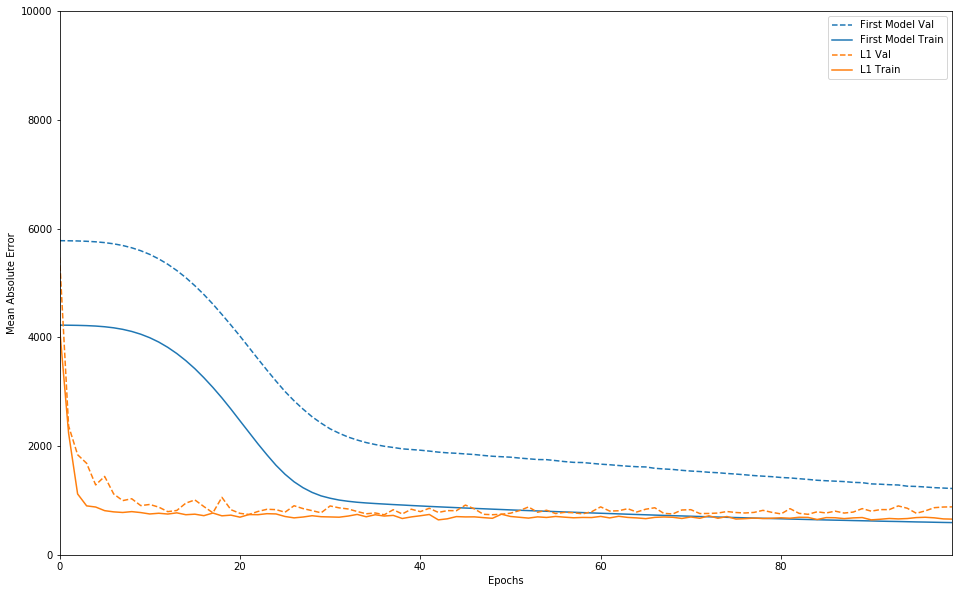

In [0]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mean_absolute_error'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,10000])

# Plot history Multiple
plot_history([('First model', f1_history),
              ('L1', l1_history)])

###2. Plotting graph for weights

<BarContainer object of 32 artists>

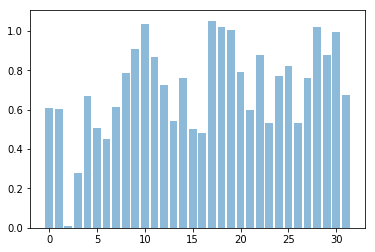

In [0]:
# Plot Weights for first model

nfw = first_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)

##Step 7: Predictions

In [0]:
#Printing prediction values for target variable using first model 

valpreds = first_model.predict_on_batch(validation_combined)
print(valpreds)

[[6512.362 ]
 [6487.901 ]
 [5444.452 ]
 [4903.4844]
 [6134.773 ]
 [6340.5146]
 [6505.498 ]
 [6718.7246]
 [6710.9883]
 [6601.296 ]
 [5850.616 ]
 [5572.398 ]
 [5950.6045]
 [6203.4863]
 [5793.6113]
 [6112.503 ]
 [5105.6343]
 [5619.216 ]
 [5582.2246]
 [6156.7373]
 [5951.6494]
 [6118.2646]
 [6102.2515]
 [5863.6016]
 [5909.9795]
 [5201.7446]
 [4400.115 ]
 [5525.541 ]
 [5704.502 ]
 [5769.1694]
 [5606.8223]
 [5741.679 ]
 [5978.549 ]
 [5779.783 ]
 [5968.5024]
 [6161.788 ]
 [5937.9834]
 [5837.1104]
 [5783.6865]
 [5864.847 ]
 [4900.367 ]
 [6307.7236]
 [6372.9023]
 [6652.3784]
 [5685.4604]
 [4875.2783]
 [4218.049 ]
 [4902.8486]
 [5743.409 ]
 [5753.9097]
 [5443.757 ]
 [5587.427 ]
 [5309.4453]
 [5209.826 ]
 [5712.6714]
 [5583.112 ]
 [5267.811 ]
 [5661.0625]
 [6019.9546]
 [5675.217 ]
 [6092.8945]
 [6263.3184]
 [6513.7534]
 [5634.0356]
 [5591.669 ]
 [5336.8833]
 [4321.0913]
 [3172.965 ]
 [3925.398 ]
 [4662.5645]
 [4803.3936]
 [4711.5728]
 [4417.3076]
 [4607.423 ]
 [4508.772 ]
 [4453.615 ]
 [3811.278 ]

In [0]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(validation_target)

600    7765
601    7582
602    6053
603    5255
604    6917
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 131, dtype: int64


## Analysis of all models (Model Comparison) - Question 3

-  From above models, we can see that, we are getting mean absolute error of 1504.6538080531475 with baseline model. But after building and fitting all DNN models we are getting less error as compared to baseline model for all models (first_model, l1_model).

- Best model is : L1 model with minimum mean absolute error of 735.8213, and from the graph we can see that, error is error between validation and training data is less for l1_model.

- Hence, when we compare Baseline model with DNN models, we can conclude that we are getting better predictions and accuracy with DNN model. 